In [1]:
import os
import time
import shutil
import pathlib
import itertools

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [8]:
import splitfolders

splitfolders.ratio("mango_dataset_pro", output="output_dataset", seed=1337, ratio=(0.7, 0.15, 0.15)) 


In [9]:
# Define ImageDataGenerator with Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
# Load train dataset
train_generator = train_datagen.flow_from_directory(
    "output_dataset/train",
    target_size=(128, 128), 
    batch_size=32,
    class_mode="categorical"  
)

Found 2800 images belonging to 8 classes.


In [13]:
# Load test dataset
test_generator = test_datagen.flow_from_directory(
    "output_dataset/test",
    target_size=(128, 128), 
    batch_size=32,
    class_mode="categorical"  
)

Found 606 images belonging to 8 classes.


In [14]:
# Load validation dataset
val_generator = val_datagen.flow_from_directory(
    "output_dataset/val",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

Found 600 images belonging to 8 classes.


In [15]:
# Define CNN Model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(train_generator.num_classes, activation='softmax') 
])


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [19]:
# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=70,  
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

Epoch 1/70
88/88 [==============================] - 46s 527ms/step - loss: 1.3400 - accuracy: 0.4875 - val_loss: 0.9262 - val_accuracy: 0.6700
Epoch 2/70
88/88 [==============================] - 29s 329ms/step - loss: 0.7760 - accuracy: 0.7150 - val_loss: 0.5205 - val_accuracy: 0.8083
Epoch 3/70
88/88 [==============================] - 29s 335ms/step - loss: 0.5798 - accuracy: 0.7939 - val_loss: 0.4723 - val_accuracy: 0.7833
Epoch 4/70
88/88 [==============================] - 38s 430ms/step - loss: 0.4985 - accuracy: 0.8271 - val_loss: 0.3338 - val_accuracy: 0.8700
Epoch 5/70
88/88 [==============================] - 33s 374ms/step - loss: 0.3082 - accuracy: 0.8929 - val_loss: 0.2255 - val_accuracy: 0.9100
Epoch 6/70
88/88 [==============================] - 31s 352ms/step - loss: 0.2468 - accuracy: 0.9225 - val_loss: 0.2149 - val_accuracy: 0.9267
Epoch 7/70
88/88 [==============================] - 31s 352ms/step - loss: 0.2487 - accuracy: 0.9161 - val_loss: 0.2088 - val_accuracy: 0.9200

In [20]:
# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
epochs_range = range(len(acc))

In [22]:
epochs_range

range(0, 70)

Text(0.5, 1.0, 'Training and Validation Accuracy')

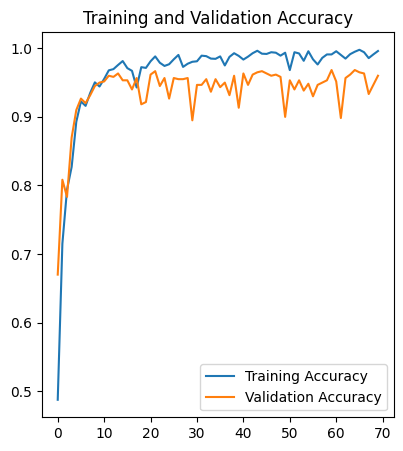

In [23]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

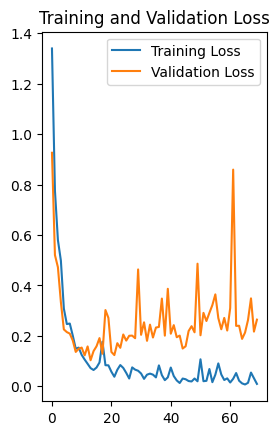

In [24]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [25]:
plt.show()

In [26]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

19/19 [==============================] - 5s 253ms/step - loss: 0.2201 - accuracy: 0.9571
Test Accuracy: 0.96


In [27]:
from tensorflow.keras.preprocessing import image
# Load an image
img_path = "image_ml/images8.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict class
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
print(f"Predicted index: {predicted_index}")

class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse mapping
predicted_class_name = class_labels[predicted_index]

print(f"Predicted Class: {predicted_class_name}")  # Print actual class name



1/1 [==============================] - 0s 213ms/step
Predicted index: 7
Predicted Class: Sooty Mould


In [30]:
model.save("model.h5")